In [1]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
from IPython.display import display

processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.17k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [4]:
def show_image(path_str):
    img = Image.open(path_str).convert("RGB")
    display(img)
    return img

# Function to perform OCR on image
def ocr_image(src_img):
    pixel_values = processor(images=src_img, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    return processor.batch_decode(generated_ids, skip_special_tokens=True)[0]


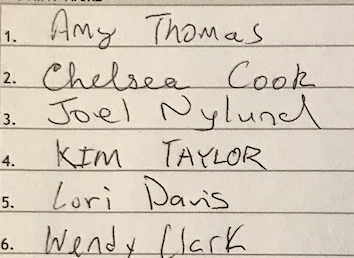

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1249: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


0 0


In [5]:
# Load and show the image
hw_image = show_image('/content/g0f81 (1).png')

# Performingg OCR and print the output
output_text = ocr_image(hw_image)
print(output_text)

In [6]:
# Incase printed image consist of multiple lines text
hw_image1 = hw_image.crop((0, 10, hw_image.size[0], 40))
display(hw_image1)
output_text_line = ocr_image(hw_image1)
print(output_text_line)

In Ames Thomas


In [7]:
# importing required model and processor for printed text
printed_processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-printed')
printed_model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-printed')

preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [8]:
def ocr_printed_image(src_img):
    pixel_values = printed_processor(images=src_img, return_tensors="pt").pixel_values
    generated_ids = printed_model.generate(pixel_values)
    return printed_processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

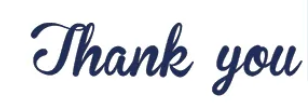

In [12]:
# Load and show the printed image
invoice_image = show_image('/content/Capture.PNG')

In [13]:
# Perform OCR on the printed image and print the output
output_printed_text = ocr_printed_image(invoice_image)
print(output_printed_text)

THANK YOU


In [14]:
# Incase printed image consist of multiple lines text
invoice_image1 = invoice_image.crop((0, 200, invoice_image.size[0], 225))
display(invoice_image1)
output_printed_text_line = ocr_printed_image(invoice_image1)
print(output_printed_text_line)

DISCOUNT: GST REGEIPT FOR AN OFFER
